In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

1. For the following 1-dimensional data points apply agglomerative hierarchical clustering to build the dendrogram.
Construct the proximity matrix (distance matrix). Merge the clusters using the single linkage (min distance) and update
the proximity matrix accordingly. Clearly show the proximity matrix corresponding to each iteration of the algorithm.
18, 22, 25, 27, 42, 43

In [169]:
data=np.array([18, 22, 25, 27, 42, 43])

In [170]:
def euclidean(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [171]:
def proximity_mat_init(data):
    mat = np.zeros((len(data), len(data))) 
    for i in range(len(data)):
        for j in range(len(data)):
            mat[i][j] = euclidean(data[i], data[j])
    return mat
mat=proximity_mat_init(data)
mat

array([[ 0.,  4.,  7.,  9., 24., 25.],
       [ 4.,  0.,  3.,  5., 20., 21.],
       [ 7.,  3.,  0.,  2., 17., 18.],
       [ 9.,  5.,  2.,  0., 15., 16.],
       [24., 20., 17., 15.,  0.,  1.],
       [25., 21., 18., 16.,  1.,  0.]])

In [172]:
def merge(mat, method):
    min_dist = float('inf')
    pts = (0, 0)
    for i in range(len(mat)):
        for j in range(i + 1, len(mat)):
            if mat[i][j] < min_dist:  
                min_dist = mat[i][j]
                pts = (i, j)
    
    if method == 'single':
        for k in range(len(mat)):
            if k != pts[0] and k != pts[1]:
                mat[pts[0]][k] = mat[k, pts[0]] = min(mat[pts[0]][k], mat[pts[1]][k])
    elif method == 'complete':
        for k in range(len(mat)):
            if k != pts[0] and k != pts[1]:
                mat[pts[0]][k] = mat[k, pts[0]] = max(mat[pts[0]][k], mat[pts[1]][k])
    elif method == 'average':
        for k in range(len(mat)):
            if k != pts[0] and k != pts[1]:
                mat[pts[0]][k] = mat[k, pts[0]] = (mat[pts[0]][k] + mat[pts[1]][k]) / 2
                
    mat = np.delete(mat, pts[1], axis=0)
    mat = np.delete(mat, pts[1], axis=1)
    return mat, pts, min_dist

In [173]:
def agg_clustering(data, method):
    n = len(data)
    mat = proximity_mat_init(data)
    proximity_mats = [mat.copy()]
    merges = []
    dists = []
    current_labels = list(range(n))

    while len(mat) > 1:
        mat, pts, dist = merge(mat, method)
        dists.append(dist)
        proximity_mats.append(mat.copy())
        merges.append((current_labels[pts[0]], current_labels[pts[1]]))
        new_label = n + len(merges) - 1
        current_labels[pts[0]] = new_label
        current_labels.pop(pts[1])

    return proximity_mats, merges, dists

In [174]:
proximity_mats, merges, dists = agg_clustering(data, 'single')
for mat in proximity_mats:
    print(f"Proximity Matrix:\n{mat}\n")

Proximity Matrix:
[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Proximity Matrix:
[[ 0.  4.  7.  9. 24.]
 [ 4.  0.  3.  5. 20.]
 [ 7.  3.  0.  2. 17.]
 [ 9.  5.  2.  0. 15.]
 [24. 20. 17. 15.  0.]]

Proximity Matrix:
[[ 0.  4.  7. 24.]
 [ 4.  0.  3. 20.]
 [ 7.  3.  0. 15.]
 [24. 20. 15.  0.]]

Proximity Matrix:
[[ 0.  4. 24.]
 [ 4.  0. 15.]
 [24. 15.  0.]]

Proximity Matrix:
[[ 0. 15.]
 [15.  0.]]

Proximity Matrix:
[[0.]]



<function matplotlib.pyplot.show(close=None, block=None)>

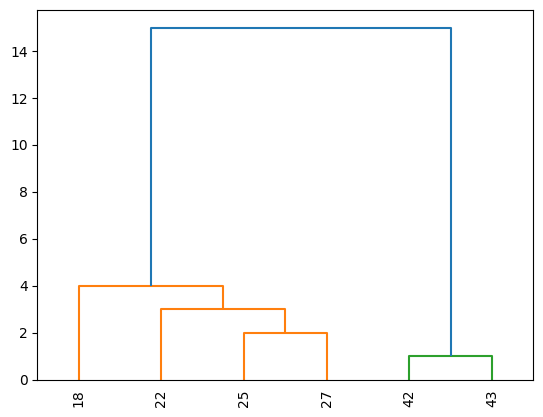

In [175]:
linkage_matrix = np.array([[m1, m2, dists[i], 2] for i, (m1, m2) in enumerate(merges)])
dendrogram(linkage_matrix, labels=data, leaf_rotation=90, leaf_font_size=10)
plt.show

2. Consider the following data set and apply the hierarchical data-clustering algorithm, to identify the clusters. Solve it 
manually by considering all linkage functions (Single, Complete and Average) using Euclidean distance.

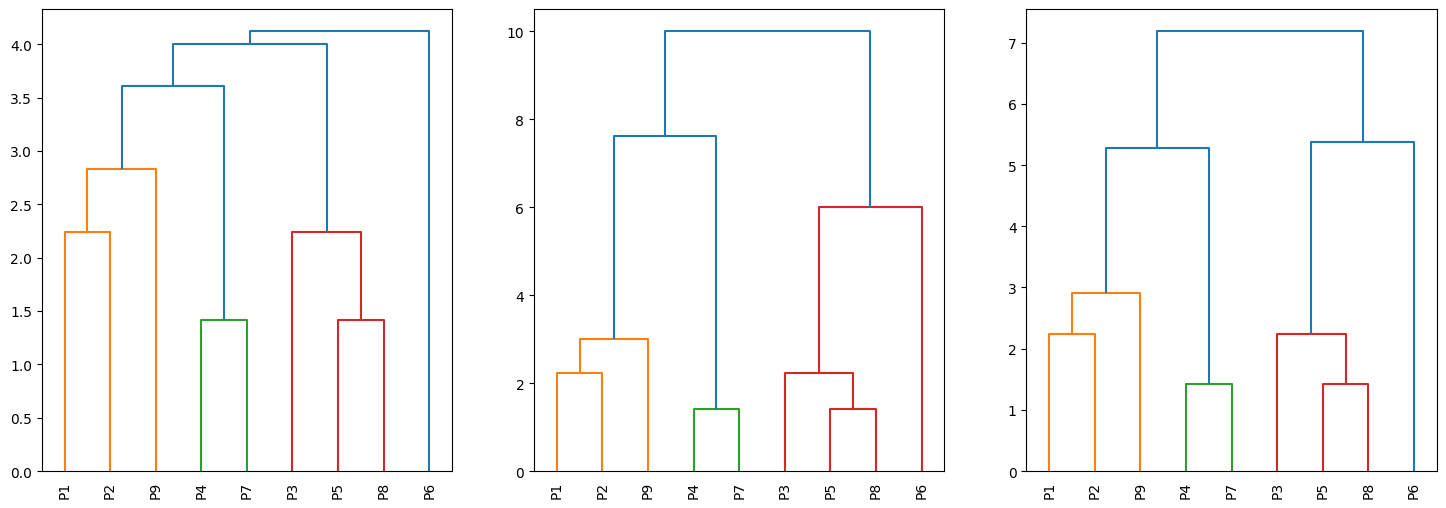

In [180]:
df=pd.read_csv('data.csv')
coordinates = df[['x', 'y']].values

linkage_methods = ['single', 'complete', 'average']
linkage_matrices = []

plt.figure(figsize=(18, 6))

for method in linkage_methods:
    proximity_mats, merges, dists = agg_clustering(coordinates, method)
    linkage_matrix = np.array([[m1, m2, dists[i], 2] for i, (m1, m2) in enumerate(merges)])
    linkage_matrices.append(linkage_matrix)
    
    plt.subplot(1, 3, linkage_methods.index(method) + 1)
    dendrogram(linkage_matrix, labels=df['Point'].values, leaf_rotation=90, leaf_font_size=10)
    # plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    # plt.xlabel('Data Points')
    # plt.ylabel('Distance')


# plt.tight_layout()
# plt.show()


3. Consider the above-mentioned data set in Q no 1 and apply the hierarchical data-clustering algorithm, to identify the 
clusters. Write a Python function (without using the scikit-learn library) to do the following:  
a. Plot a scatter graph of given data points.   
b. Plot the dendrogram for single, complete and average linkage methods.  

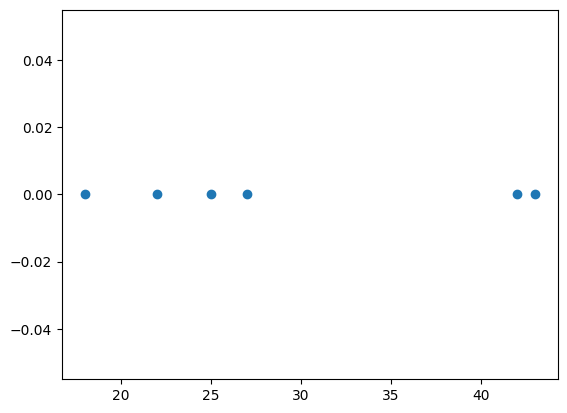

In [182]:
plt.scatter(data, np.zeros_like(data))

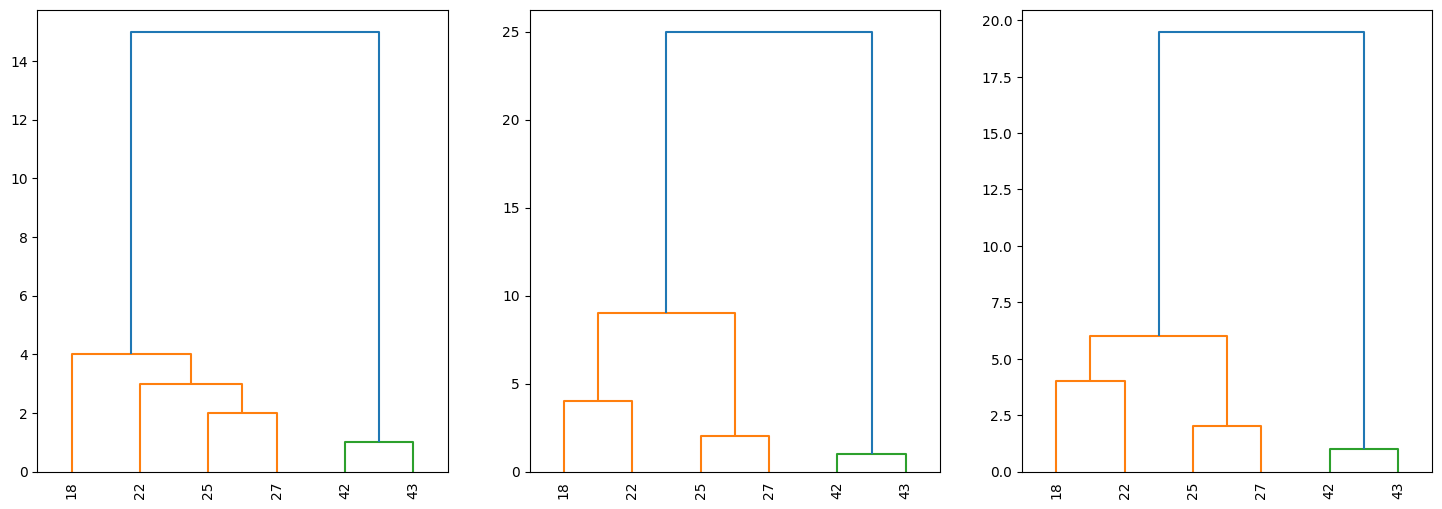

In [179]:
linkage_methods = ['single', 'complete', 'average']
linkage_matrices = []

plt.figure(figsize=(18, 6))

for method in linkage_methods:
    proximity_mats, merges, dists = agg_clustering(data, method)
    linkage_matrix = np.array([[m1, m2, dists[i], 2] for i, (m1, m2) in enumerate(merges)])
    linkage_matrices.append(linkage_matrix)
    
    plt.subplot(1, 3, linkage_methods.index(method) + 1)
    dendrogram(linkage_matrix, labels=data, leaf_rotation=90, leaf_font_size=10)
    # plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    # plt.xlabel('Data Points')
    # plt.ylabel('Distance')


# plt.tight_layout()
# plt.show()
